<a href="https://colab.research.google.com/github/vladiant/SoftUniMachineLearning2019/blob/master/3_Model_Training_And_Improvement/ModelTrainingAndImprovement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
income_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=", ", header=None, engine = "python")
income_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
income_data.columns=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

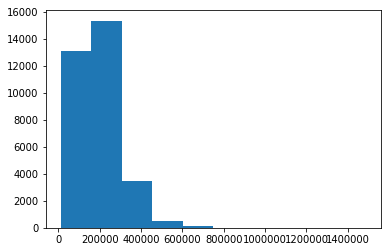

In [ ]:
plt.hist(income_data.fnlwgt)

In [ ]:
income_data = income_data.drop("fnlwgt", axis=1)

In [ ]:
# Check if set is balanced
income_data.groupby("income_class").size() / len(income_data)

income_class
<=50K    0.75919
>50K     0.24081
dtype: float64

In [ ]:
income_data_attributes = income_data.drop("income_class", axis=1)
income_data_labels = income_data.income_class

In [ ]:
income_data_attributes.shape

(32561, 13)

In [ ]:
income_data_labels.shape

(32561,)

In [ ]:
# We need to have only numbers for processing
# Be careful not to have too many variables! False positivies may arise!
income_data_attributes = pd.get_dummies(income_data_attributes)
income_data_attributes.shape

(32561, 107)

In [ ]:
income_data_attributes.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
income_data_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
workclass_?,32561.0,0.056386,0.230670,0.0,0.0,0.0,0.0,1.0
workclass_Federal-gov,32561.0,0.029483,0.169159,0.0,0.0,0.0,0.0,1.0
workclass_Local-gov,32561.0,0.064279,0.245254,0.0,0.0,0.0,0.0,1.0
workclass_Never-worked,32561.0,0.000215,0.014661,0.0,0.0,0.0,0.0,1.0
workclass_Private,32561.0,0.697030,0.459549,0.0,0.0,1.0,1.0,1.0


In [ ]:
income_data_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 107 entries, age to native-country_Yugoslavia
dtypes: int64(5), uint8(102)
memory usage: 4.4 MB


In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit only trans transformation
income_data_attributes_scaled = scaler.fit_transform(income_data_attributes)

In [ ]:
test_transform = np.random.randint(1, 100, (50, 107))
test_transform

array([[74,  8, 65, ..., 13,  3, 79],
       [89, 48, 54, ..., 42, 59, 21],
       [ 4, 51, 65, ..., 66,  1, 36],
       ...,
       [90, 40, 48, ..., 72, 98, 28],
       [43, 83, 89, ..., 52,  2, 85],
       [71, 50, 20, ..., 26, 47, 67]])

In [ ]:
scaler.transform(test_transform)

array([[ 2.59661099e+00, -8.08759221e-01, -1.37119072e-01, ...,
         3.96277734e+01,  6.61579468e+01,  3.56467545e+03],
       [ 3.69629975e+00,  1.47392247e+01, -1.38608541e-01, ...,
         1.34570920e+02,  1.30195391e+03,  9.47555676e+02],
       [-2.53526988e+00,  1.59053234e+01, -1.37119072e-01, ...,
         2.13144559e+02,  2.20223767e+01,  1.62439700e+03],
       ...,
       [ 3.76961234e+00,  1.16296279e+01, -1.39420979e-01, ...,
         2.32787969e+02,  2.16259753e+03,  1.26341496e+03],
       [ 3.23920893e-01,  2.83437106e+01, -1.33869319e-01, ...,
         1.67309937e+02,  4.40901617e+01,  3.83541198e+03],
       [ 2.37667324e+00,  1.55166239e+01, -1.43212357e-01, ...,
         8.21884944e+01,  1.03714049e+03,  3.02320239e+03]])

In [ ]:
logistic_model = LogisticRegression(C = 1e6)

In [ ]:
logistic_model.fit(income_data_attributes_scaled, income_data_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(income_data_attributes_scaled, income_data_labels, train_size = 0.7)

In [ ]:
labels_train.shape

(22792,)

In [ ]:
labels_test.shape

(9769,)

In [ ]:
attributes_train.shape

(22792, 107)

In [ ]:
attributes_test.shape

(9769, 107)

In [ ]:
model = LogisticRegression(C = 100)

In [ ]:
model.fit(attributes_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(attributes_train, labels_train)

0.851044226044226

In [ ]:
model.score(attributes_test, labels_test)

0.8547446002661481

In [ ]:
# f1
train_predictions = model.predict(attributes_train)
test_predictions = model.predict(attributes_test)


In [ ]:
f1_score(labels_train, train_predictions, pos_label = ">50K")

0.6580723134253198

In [ ]:
f1_score(labels_test, test_predictions, pos_label = ">50K")

0.6714517249363278